## Regressionsmodell

In [12]:
%pip install statsmodels
# Import necessary libraries
import pandas as pd  # For data manipulation and handling
import statsmodels.formula.api as smf  # For statistical modeling

# Load the dataset 
data=pd.read_csv("/workspaces/DS_ML_Gr_1.5/0_DataPreparation/umsatzdaten_codiert.csv")

# Fit a linear regression model
# - 'price' is the dependent variable (target) we aim to predict.
# - 'sqft_lot15' represents the size of neighboring lots (continuous feature).
# - 'C(condition)' treats the 'condition' feature as a categorical variable.
mod = smf.ols('Umsatz ~ Wochentag', data=data).fit()

# Output the summary of the fitted model
# The summary includes key metrics such as R-squared, coefficients, and p-values.
print(mod.summary())




[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
                            OLS Regression Results                            
Dep. Variable:                 Umsatz   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     43.35
Date:                Tue, 03 Dec 2024   Prob (F-statistic):           1.60e-52
Time:                        16:15:20   Log-Likelihood:                -59539.
No. Observations:                9334   AIC:                         1.191e+05
Df Residuals:                    9327   BIC:                         1.191e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       

        Datum  Warengruppe      Umsatz  Wochentag  Monday  Tuesday  Wednesday  \
0  2013-07-01            1  148.828353     Monday       1        0          0   
1  2013-07-02            1  159.793757    Tuesday       0        1          0   
2  2013-07-03            1  111.885594  Wednesday       0        0          1   
3  2013-07-04            1  168.864941   Thursday       0        0          0   
4  2013-07-05            1  171.280754     Friday       0        0          0   

   Thursday  Friday  Saturday  Sunday  Brot_W1  Broetchen_W2  Croissant_W3  \
0         0       0         0       0        1             0             0   
1         0       0         0       0        1             0             0   
2         0       0         0       0        1             0             0   
3         1       0         0       0        1             0             0   
4         0       1         0       0        1             0             0   

   Konditorei_W4  Kuchen_W5  Saisonbrot_W6  

/tmp/ipykernel_12552/1698119674.py:50: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color="red")


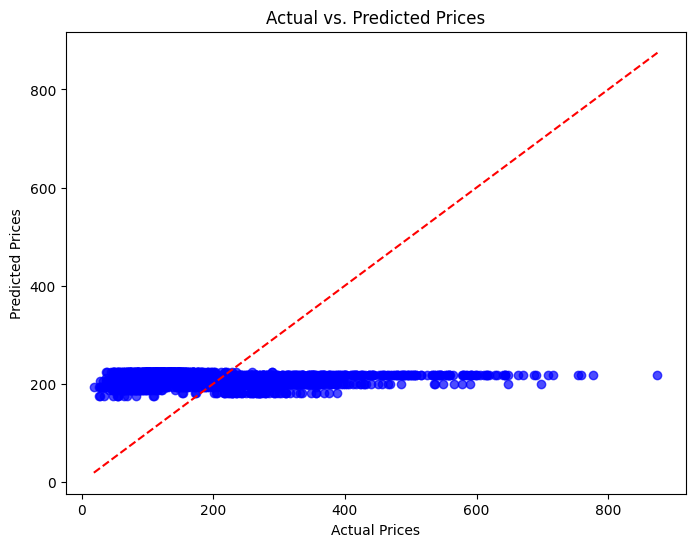

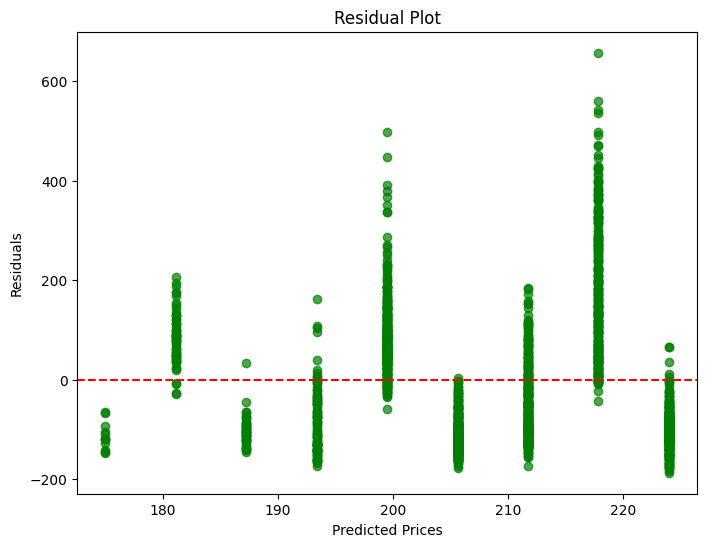

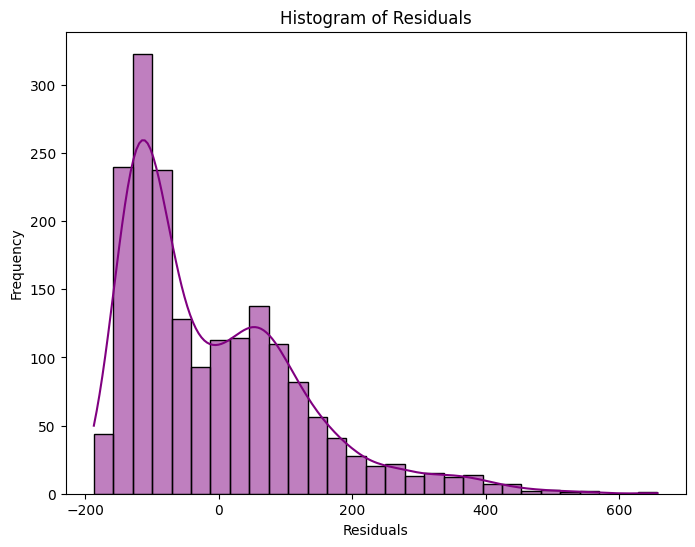

/tmp/ipykernel_12552/1698119674.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette="Blues_r")


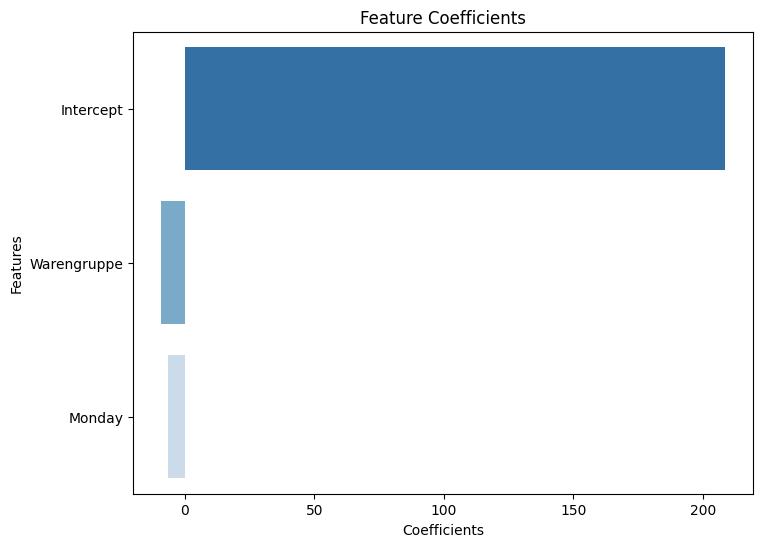

In [14]:
# Import necessary libraries
import pandas as pd  # Data manipulation and handling
import statsmodels.api as sm  # Building and summarizing regression models
from sklearn.preprocessing import StandardScaler  # Scaling features for regression
from sklearn.model_selection import train_test_split  # Splitting data into train and test sets
import matplotlib.pyplot as plt  # Visualization library
import seaborn as sns  # Advanced data visualizations

# Load the dataset 
data=pd.read_csv("/workspaces/DS_ML_Gr_1.5/0_DataPreparation/umsatzdaten_codiert.csv")

# Display the first few rows of the dataset for inspection
print(data.head())

# Select features and target variable
# Features include 'sqft_lot15' (neighboring lot size), 'zipcode' (location), and 'yr_built' (year built)
features = ['Warengruppe', 'Monday']
X = data[features]
y = data['Umsatz']  # Target variable: house price

# Scale the feature data to standardize the range
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Add a constant term to the training data for the regression intercept
X_train = sm.add_constant(X_train)

# Train the linear regression model using Statsmodels
model = sm.OLS(y_train, X_train).fit()

# Print the summary of the regression model
# Includes metrics like R-squared, coefficients, and p-values for each feature
print(model.summary())

# Make predictions on the test set
X_test = sm.add_constant(X_test)  # Add constant to test set for predictions
predictions = model.predict(X_test)
print("Predictions for test data:", predictions)

# Calculate Mean Absolute Percentage Error (MAPE) for error evaluation
mape = (abs((y_test - predictions) / y_test).mean()) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Scatter plot: Actual vs. Predicted Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color="red")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices")
plt.show()

# Calculate residuals (differences between actual and predicted values)
residuals = y_test - predictions

# Residual plot: Predicted Prices vs. Residuals
plt.figure(figsize=(8, 6))
plt.scatter(predictions, residuals, alpha=0.7, color="green")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Histogram of residuals to check normality
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color="purple")
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Create a DataFrame of model coefficients
coefficients = pd.DataFrame({
    'Feature': ['Intercept'] + features,
    'Coefficient': model.params
})

# Bar plot of feature coefficients
plt.figure(figsize=(8, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette="Blues_r")
plt.title("Feature Coefficients")
plt.xlabel("Coefficients")
plt.ylabel("Features")
plt.show()